In [2]:
import numpy as np
import pandas as pd

#Read companies.txt into a dataframe
companies = pd.read_csv(r"companies.txt", delimiter="\t",encoding="ISO-8859-1")
rounds2 = pd.read_csv(r"rounds2.csv",encoding="ISO-8859-1")

#Since permalink in companies.txt and company_permalink in rounds2.csv have different casing, 
# create a new column with permalink changed to lower case in both dataframes
rounds2['permalink-key'] = pd.Series(list(map(lambda x:x.lower(),rounds2['company_permalink'])))
companies['permalink-key'] = pd.Series(list(map(lambda x:x.lower(),companies['permalink'])))

#merge the DFs on newly created permalink key
master_frame = pd.merge(companies, rounds2, how='inner', on='permalink-key')


###Clean up master_frame before further analysis
master_frame = master_frame.drop('funding_round_code', axis=1)
master_frame = master_frame[~master_frame.category_list.isnull()]
master_frame = master_frame[~master_frame.raised_amount_usd.isnull()]

#set the format so that funding amounts are not changed to exponential scale
pd.set_option('display.float_format', lambda x: '%.0f' % x)



#group the master frame by funding round type
group_ftype = master_frame.groupby('funding_round_type', axis=0)

#filter out a new df containing only venture fund investments
venture_df = master_frame.loc[master_frame['funding_round_type'] == 'venture']

#create a new DF containing values sorted based on amount of investment by venture funds
sorted_vdf = venture_df.sort_values(by='raised_amount_usd',ascending=False)

#Group by country and find out the top countries by investment value and investment count
sorted_group = sorted_vdf.groupby('country_code');
country_investment_value = pd.DataFrame(sorted_group['raised_amount_usd'].sum().sort_values(ascending=False))
country_investment_count = pd.DataFrame(sorted_group['raised_amount_usd'].count().sort_values(ascending=False))
country_investment_count.columns = ['count']
#country_investment_count
#country_investment_value
#country_investment
#sorted_country_inv = country_investment.sort_values(by='raised_amount_usd',ascending=False)
#sorted_country_inv




In [3]:
#master_frame.isnull().sum()
#master_frame = master_frame.drop('funding_round_code', axis=1)
#round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

In [4]:
#master_frame = master_frame[~master_frame.category_list.isnull()]
#round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

In [5]:
#master_frame['raised_amount_usd'].describe()
#master_frame = master_frame[~master_frame.raised_amount_usd.isnull()]
#round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

In [6]:
countries = country_investment_value.index.get_level_values(0)

top9 = pd.DataFrame(pd.Series(list(countries[0:9])))
top9.columns = ['country_code']
print(top9)
#d.head(20)
#print(countries)
#len(countries)

#extract primary category from category_list and create a new column for it in sorted_vdf
categories = sorted_vdf['category_list'].str.split('|', n=1,expand=True)
sorted_vdf['category_list'] = categories.iloc[:,0]

  country_code
0          USA
1          CHN
2          GBR
3          IND
4          CAN
5          FRA
6          ISR
7          DEU
8          JPN


In [7]:
####
#from pandas.api.types import is_string_dtype
#is_string_dtype(sorted_vdf['raised_amount_usd'])

#s = sorted_vdf['category_list'].apply(lambda x: string_(x).strip("|"))
#print(s)
#sorted_vdf['primary_category'] = pd.Series(list(map((lambda str: str.rstrip('|')),sorted_vdf['category_list'])))
#sorted_vdf['category_list'].head(20)
####



#import pycountry as pc
#sorted_vdf.head(2)
#import babel as b
#from babel import Locale
#l = Locale('ind')
#l.get_language_name('aF')
#print(ind)
#babel.languages.get_territory_language_info('IN')
#companies.head(10)
#rounds2.head(10)


In [8]:
mapping = pd.read_csv(r"mapping.csv",encoding="ISO-8859-1")
vdf_sectors = pd.merge(sorted_vdf,mapping,on='category_list')



vdf_usa = vdf_sectors.loc[vdf_sectors['country_code']=='USA']
vdf_ind = vdf_sectors.loc[vdf_sectors['country_code']=='IND']
vdf_gbr = vdf_sectors.loc[vdf_sectors['country_code']=='GBR']

vdf_top3 = vdf_usa.append(vdf_ind).append(vdf_gbr)

#h = vdf_top3.loc[vdf_top3.Health==1]
#vdf_top3['main_sector'] = pd.Series(list(map(lambda x: if x==1 return 'Health'),vdf_top3['Health']))

#vdf_top3.head(2)


#vdf_gbr.loc[vdf_gbr['Automotive & Sports']!=0]['raised_amount_usd'].sum()
#vdf_gbr.loc[vdf_gbr['Health']!=0]['raised_amount_usd'].sum()
#mapping.head(2)

In [9]:
#health = vdf_top3.groupby(by=['Health','country_code'])
#category = vdf_top3.groupby(by=['category_list','country_code'])
#category['raised_amount_usd'].sum()

In [10]:
def is_main_category(row):
    if(row['Health']==1):
        return 'Health'
    if(row['Automotive & Sports']==1):
     return 'Automotive & Sports'
    if(row['Cleantech / Semiconductors']==1):
        return 'Cleantech / Semiconductors'
    if(row['Entertainment']==1):
        return 'Entertainment'
    if(row['Manufacturing']==1):
        return 'Manufacturing'
    if(row['News, Search and Messaging']==1):
        return 'News, Search and Messaging'
    if(row['Social, Finance, Analytics, Advertising']==1):
        return 'Social, Finance, Analytics, Advertising'
    if(row['Others']==1):
        return 'Others'
    

vdf_top3['Main_Sector']=vdf_top3.apply(is_main_category,axis=1)



mc_group = vdf_top3.groupby(by=['country_code','Main_Sector'])
#mc_group['raised_amount_usd'].count()
#mc_group['raised_amount_usd'].count()
#mc_group['raised_amount_usd'].describe()

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

company_group = vdf_top3.groupby(by=['country_code','Main_Sector','name'])
company_group['raised_amount_usd'].sum().sort_values(ascending=False)

sectorwise_top3_all = vdf_top3[['country_code','Main_Sector','raised_amount_usd']]
#sectorwise_top3.head(2)

sectorwise_top3 = sectorwise_top3_all[sectorwise_top3_all.Main_Sector != "Others"]



In [11]:
mc_group['raised_amount_usd'].sum()

country_code  Main_Sector                            
GBR           Automotive & Sports                          480878712
              Cleantech / Semiconductors                  5028729267
              Entertainment                               1141281250
              Health                                      1046654806
              Manufacturing                               1019283214
              News, Search and Messaging                  2956023749
              Others                                      4400423043
              Social, Finance, Analytics, Advertising     2851116278
IND           Automotive & Sports                         1556350000
              Cleantech / Semiconductors                   786444633
              Entertainment                                975705344
              Health                                       564370000
              Manufacturing                                730260000
              News, Search and Messaging         

In [12]:
ftype_df1 = pd.DataFrame(group_ftype['raised_amount_usd'].sum())
ftype_df2 = pd.DataFrame(group_ftype['raised_amount_usd'].mean())
ftype_df3 = pd.DataFrame(group_ftype['raised_amount_usd'].count())
ftype_df1.reset_index(level=0, inplace=True)
ftype_df2.reset_index(level=0, inplace=True)
ftype_df3.reset_index(level=0, inplace=True)

ftype_df = ftype_df1.merge(ftype_df2,on='funding_round_type').merge(ftype_df3,on='funding_round_type')
ftype_df

,funding_round_type,raised_amount_usd_x,raised_amount_usd_y,raised_amount_usd
0,angel,4598613672,957446,4803
1,convertible_note,2100796983,1466013,1433
2,debt_financing,113208320326,17028929,6648
3,equity_crowdfunding,605795752,518661,1168
4,grant,8960251124,4318193,2075
5,non_equity_assistance,29161937,416599,70
6,post_ipo_debt,25643094917,168704572,152
7,post_ipo_equity,51438891828,82434122,624
8,private_equity,139798456004,73385016,1905
9,product_crowdfunding,477957049,1251196,382


In [13]:
ftype_df.set_index('funding_round_type', inplace = True)
myftype_df = ftype_df.loc[['venture','seed','private_equity'],:]
#myftype_df['count'] = ftype_df
#TBD - rename columns, till then _x is total amount, _y is average investment, last one is count of investment
myftype_df.reset_index(level=0, inplace=True)
myftype_df.rename(columns={'raised_amount_usd_x':'total-amount',
                           'raised_amount_usd_y':'average-investment',
                           'raised_amount_usd':'count'},inplace=True)

print(myftype_df.columns)

Index(['funding_round_type', 'total-amount', 'average-investment', 'count'], dtype='object')


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
# set seaborn theme if you prefer
sns.set(style="white")
# increase figure size 
plt.figure(figsize=(20, 8))

##Plot for count investment
plt.yscale('log')
plt.subplot(1, 3, 1)
plt.title("Count of Investments")
sns.barplot(x='funding_round_type', y='count', data=myftype_df)


##Plot for total investment
plt.yscale('log')
plt.subplot(1, 3, 2)
plt.title("Total Amount of Investments")
sns.barplot(x='funding_round_type', y='total-amount', data=myftype_df)\


##Plot for average investment
plt.yscale('log')
plt.subplot(1, 3, 3)
plt.title("Average amount of Investments")
sns.barplot(x='funding_round_type', y='average-investment', data=myftype_df)


plt.show()


<Figure size 2000x800 with 3 Axes>

In [15]:
country_investment_value.reset_index(level=0, inplace=True)
country_investment_value_top9 = country_investment_value[0:9]
country_investment_value_top9

,country_code,raised_amount_usd
0,USA,420068029342
1,CHN,39338918773
2,GBR,20072813004
3,IND,14261508718
4,CAN,9482217668
5,FRA,7226851352
6,ISR,6854350477
7,DEU,6306921981
8,JPN,3167647127


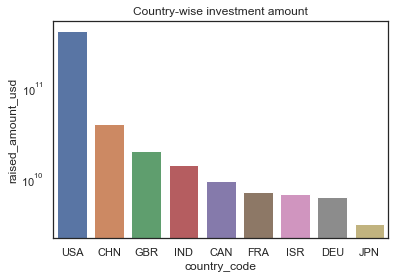

In [16]:
plt.yscale("log")
plt.title("Country-wise investment amount")
sns.barplot(x='country_code', y='raised_amount_usd', data=country_investment_value_top9)
plt.show()

In [17]:
mc_group['raised_amount_usd'].count()

country_code  Main_Sector                            
GBR           Automotive & Sports                          44
              Cleantech / Semiconductors                  433
              Entertainment                               133
              Health                                      118
              Manufacturing                               122
              News, Search and Messaging                  241
              Others                                      507
              Social, Finance, Analytics, Advertising     318
IND           Automotive & Sports                          31
              Cleantech / Semiconductors                   54
              Entertainment                                75
              Health                                       42
              Manufacturing                                55
              News, Search and Messaging                  130
              Others                                      281
              So

In [18]:
vdf_usa = sectorwise_top3.loc[sectorwise_top3.country_code == 'USA']
usa_sectors = vdf_usa.groupby(by='Main_Sector').count()
usa_sectors.reset_index(level=0, inplace=True)
usa_sectors.drop('country_code',axis=1,inplace=True)
usa_sectors['country_code'] = 'USA'
usa_sectors.rename(columns={'raised_amount_usd':'total-count'},inplace=True)
usa_sectors['total-count']= usa_sectors['total-count']/25

print(myftype_df.columns)

vdf_gbr = sectorwise_top3.loc[sectorwise_top3.country_code == 'GBR']
gbr_sectors = vdf_gbr.groupby(by='Main_Sector').count()
gbr_sectors.reset_index(level=0, inplace=True)
#gbr_sectors.drop('country_code',axis=1,inplace=True)
gbr_sectors['country_code'] = 'GBR'
gbr_sectors.rename(columns={'raised_amount_usd':'total-count'},inplace=True)
gbr_sectors['total-count']= gbr_sectors['total-count']/4

vdf_ind = sectorwise_top3.loc[sectorwise_top3.country_code == 'IND']
ind_sectors = vdf_ind.groupby(by='Main_Sector').count()
ind_sectors.reset_index(level=0, inplace=True)
#ind_sectors.drop('country_code',axis=1,inplace=True)
ind_sectors['country_code'] = 'IND'
ind_sectors.rename(columns={'raised_amount_usd':'total-count'},inplace=True)
#vdf_ind
country_aggregate = usa_sectors.append(gbr_sectors).append(ind_sectors)
country_aggregate

Index(['funding_round_type', 'total-amount', 'average-investment', 'count'], dtype='object')


C:\Users\vgarg\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Main_Sector,country_code,total-count
0,Automotive & Sports,USA,20
1,Cleantech / Semiconductors,USA,314
2,Entertainment,USA,70
3,Health,USA,131
4,Manufacturing,USA,98
5,"News, Search and Messaging",USA,172
6,"Social, Finance, Analytics, Advertising",USA,206
0,Automotive & Sports,GBR,11
1,Cleantech / Semiconductors,GBR,108
2,Entertainment,GBR,33


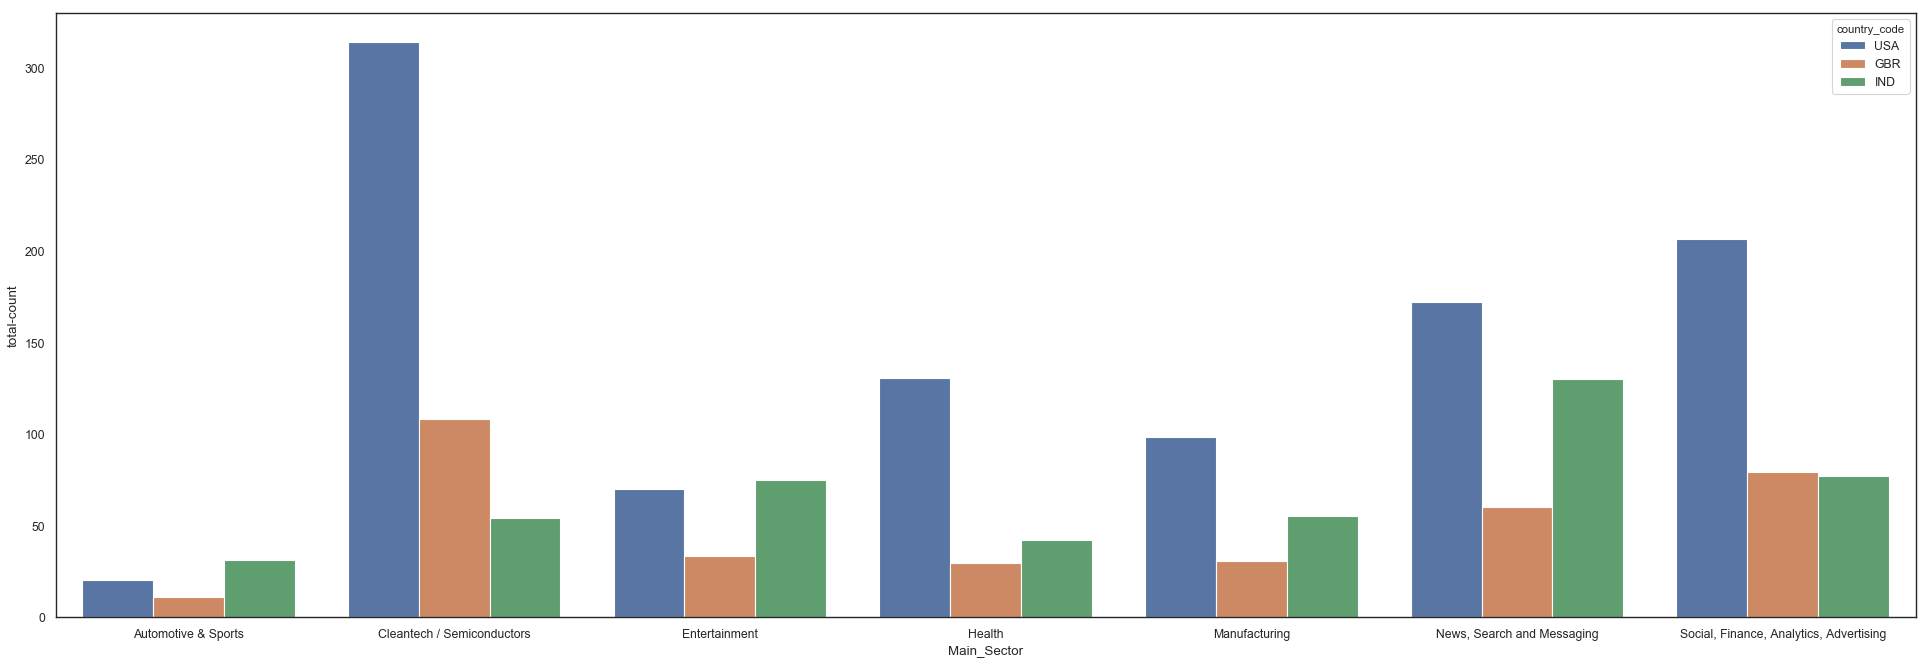

In [19]:
plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(y='total-count', x='Main_Sector',hue='country_code',data=country_aggregate)
plt.show()

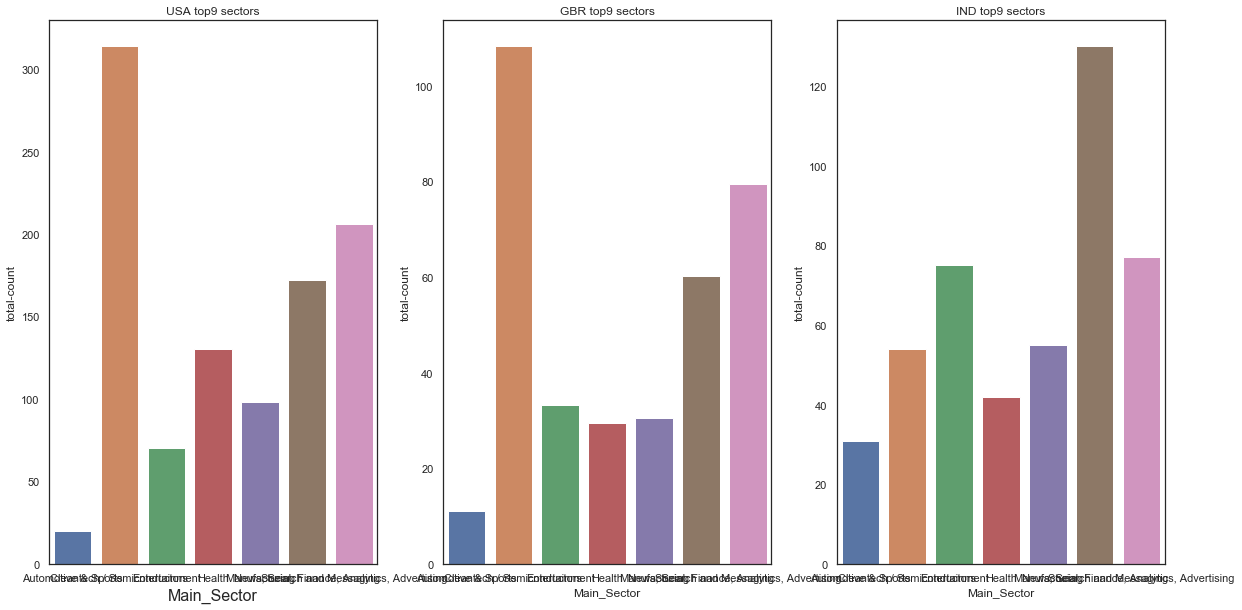

In [20]:
plt.figure(figsize=(20, 10))
#myftype_df.reset_index(level=0, inplace=True)

##Plot for USA investment
plt.xscale("linear")
plt.subplot(1, 3, 1)
plt.title("USA top9 sectors")
plt.xlabel('Count', fontsize=16)
sns.barplot(y='total-count',x='Main_Sector', data=usa_sectors)


##Plot for GBR investment
#plt.xscale('log')
plt.subplot(1, 3, 2)
plt.title("GBR top9 sectors")
sns.barplot(y='total-count',x='Main_Sector', data=gbr_sectors)



##Plot for IND investment
#plt.xscale('log')
plt.subplot(1, 3, 3)
plt.title("IND top9 sectors")
sns.barplot(y='total-count',x='Main_Sector', data=ind_sectors)


plt.show()

In [21]:
sectorwise_top3.head(10)

,country_code,Main_Sector,raised_amount_usd
0,USA,Cleantech / Semiconductors,17600000000
2,USA,Cleantech / Semiconductors,108000000
3,USA,Cleantech / Semiconductors,80323199
5,USA,Cleantech / Semiconductors,75000000
6,USA,Cleantech / Semiconductors,66000000
7,USA,Cleantech / Semiconductors,60000000
8,USA,Cleantech / Semiconductors,58401855
11,USA,Cleantech / Semiconductors,53805200
12,USA,Cleantech / Semiconductors,52000000
13,USA,Cleantech / Semiconductors,51937902


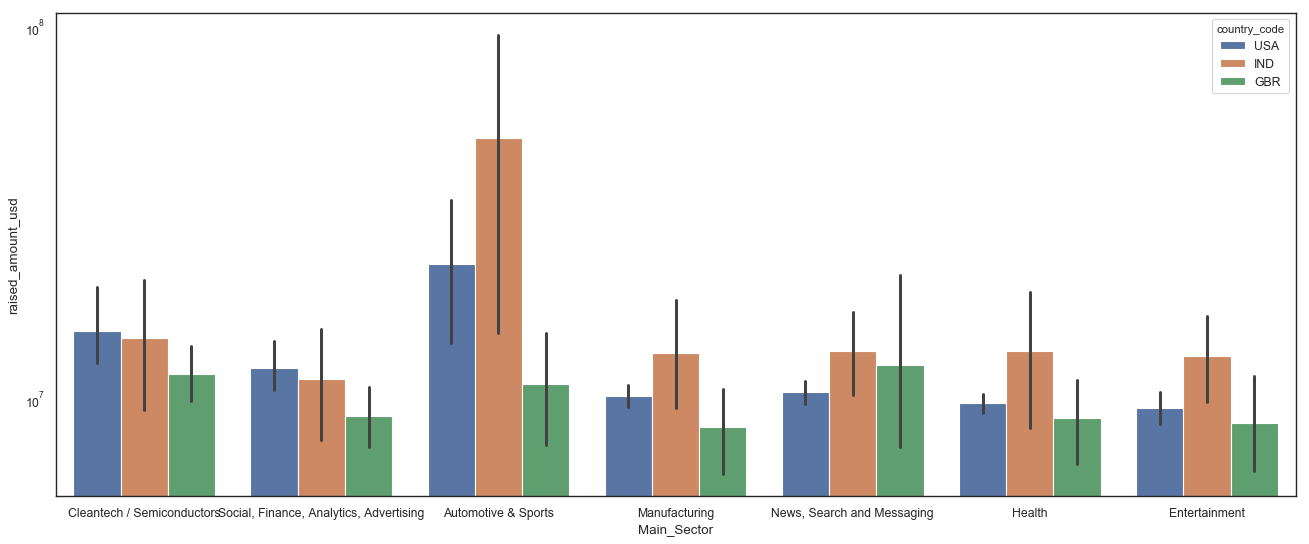

In [22]:
plt.figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')
#myftype_df.reset_index(level=0, inplace=True)

##Plot for USA investment
plt.yscale('log')
#plt.subplot(1, 3, 1)
#plt.title("USA top9 sectors")
sns.barplot(y='raised_amount_usd', x='Main_Sector', data=sectorwise_top3,hue='country_code')
plt.show()